## Plot Phi time series for each LME; compare between O2 const and T const 

In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import netCDF4
import numpy as np
from matplotlib import cm,colors
import scipy.signal as sgl
from scipy.stats import pearsonr
import os

In [2]:
USER = os.environ['USER']

## Phi ~= Phi_bar + Phi_O2 + Phi_T + Phi_S
## Phi_O2 = Phi_O2sol - Phi_AOU

In [3]:
datadir = f'/glade/scratch/{USER}/DPLE-results'
filename = f'{datadir}/DPLE-FOSI_hindcast_Phi_LME_1948-2017_monthly.nc'
ds0 = xr.open_dataset(filename)
filename = f'{datadir}/DPLE-FOSI_hindcast_Phi_mean_dimension_reduced_LME_1948-2017_monthly.nc'
ds1 = xr.open_dataset(filename)
filename = f'{datadir}/DPLE-FOSI_hindcast_Phi_components_O2_LME_1948-2017_monthly.nc'
ds2 = xr.open_dataset(filename)
filename = f'{datadir}/DPLE-FOSI_hindcast_Phi_components_T_LME_1948-2017_monthly.nc'
ds3 = xr.open_dataset(filename)
filename = f'{datadir}/DPLE-FOSI_hindcast_Phi_components_S_LME_1948-2017_monthly.nc'
ds4 = xr.open_dataset(filename)
filename = f'{datadir}/DPLE-FOSI_hindcast_Phi_components_AOU_LME_1948-2017_monthly.nc'
ds5 = xr.open_dataset(filename)

In [11]:
var = 'Phi'
layer = '0-200m'
#layer = '200-600m'

In [12]:
Phi_ori = ds0[f'{var}_4_{layer}'] # 65,840
Phi_bar = ds1[f'{var}_1_{layer}'] # 65
Phi_O2 = ds2[f'{var}_O2_1_{layer}'] # 65, 840
Phi_T = ds3[f'{var}_T_1_{layer}']   # 65, 840
Phi_S = ds4[f'{var}_S_1_{layer}']   # 65, 840
Phi_AOU = ds5[f'{var}_AOU_1_{layer}'] # 65, 840
Phi_O2sol = Phi_O2 - Phi_AOU          # 65, 840

In [13]:
from matplotlib import rc, gridspec
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
#boxna = ['EBS','GoA','CC','GoC','PH','ECS','PS','SJ','KI','SO','WBS','AI']
#boxnb = [1,2,3,4,10,47,49,50,51,52,53,65]
boxna = ['EBS','GoA','CC','GoC','GoM','SEUS','NEUS','SS','LN','IPH','AI']
boxnb = [1,2,3,4,5,6,7,8,9,10,65]

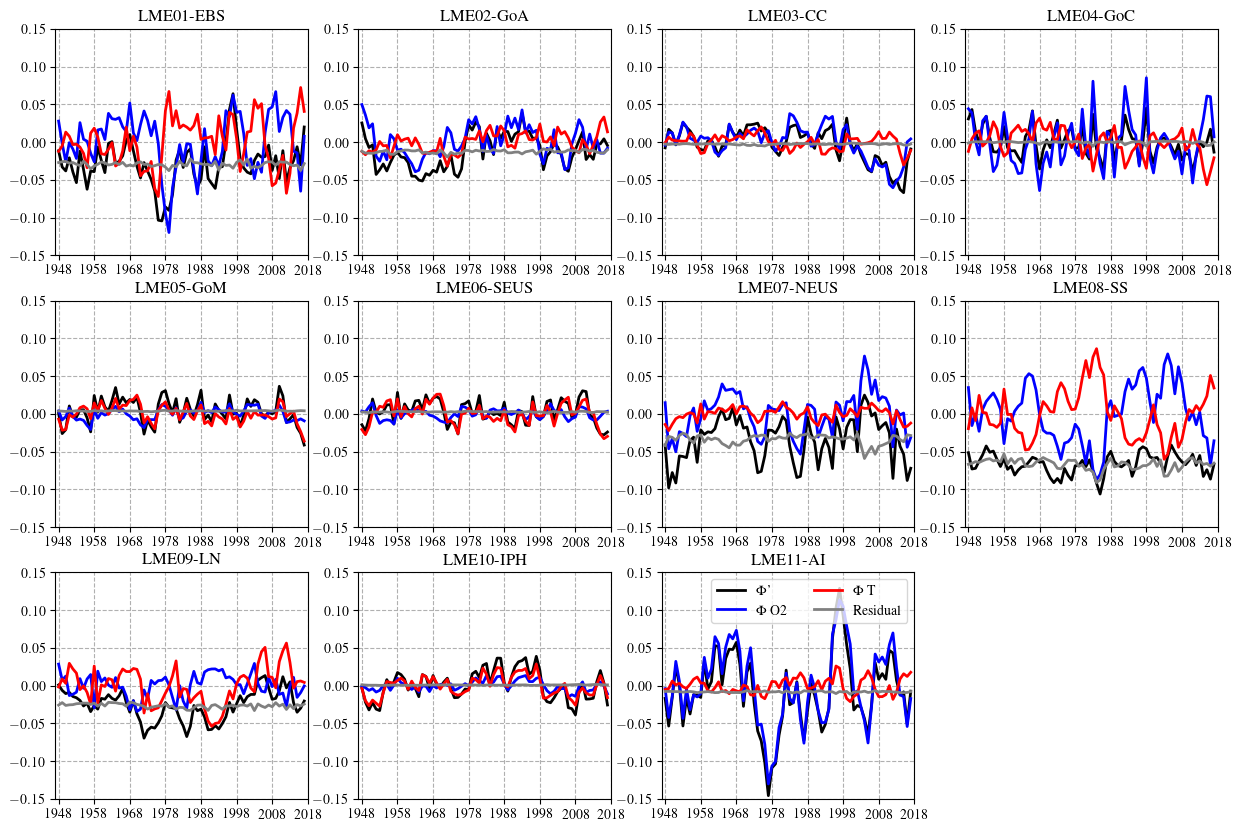

In [14]:
time = np.arange(1948,2018,1)
#vanm = ["$\Phi$'-$\Phi$' mean","$\Phi$' O2","$\Phi$' T","$\Phi$' S","$\Phi$' AOU","$\Phi$' O2sol", "Residual"]
#cols = ['k','b','r','magenta','gold','green','gray']
vanm = ["$\Phi$'","$\Phi$ O2","$\Phi$ T", "Residual"]
cols = ['k','b','r','gray']
fig = plt.figure(figsize=[15, 10])
gs = gridspec.GridSpec(3,4)
jj = 0
for box in boxnb:
    Phi_0 = Phi_ori.sel(lme=box).values.reshape([70,12]).mean(axis=1)
    Phi_1 = Phi_bar.sel(lme=box).values
    Phi_2 = Phi_O2.sel(lme=box).values.reshape([70,12]).mean(axis=1)
    Phi_3 = Phi_T.sel(lme=box).values.reshape([70,12]).mean(axis=1)
    Phi_4 = Phi_S.sel(lme=box).values.reshape([70,12]).mean(axis=1)
    Phi_5 = Phi_AOU.sel(lme=box).values.reshape([70,12]).mean(axis=1)
    Phi_6 = Phi_2 - Phi_5
    #Phi_6 = Phi_O2sol.sel(lme=box).values.reshape([70,12]).mean(axis=1)
    Phi_7 = Phi_0-(Phi_1+Phi_2+Phi_3)
    #
    #corr1 = pearsonr(Phi_Ori,Phi_O2ct)[0]
    #corr2 = pearsonr(Phi_Ori,Phi_Tct)[0]
    #
    ax = fig.add_subplot(gs[jj])
    #for ii,varr in zip(range(7),[Phi_0-Phi_1,Phi_2,Phi_3,Phi_4,Phi_5,Phi_6,Phi_7]):
    for ii,varr in zip(range(4),[Phi_0-Phi_1,Phi_2,Phi_3,Phi_7]):
    
        ax.plot(time, varr, color=cols[ii], lw=2, label=vanm[ii])
    if jj == 10:
        ax.legend(loc=0, ncol=2)
    ax.grid(linestyle='dashed')
    if box == 65:
        #ax.set_title('LME%02d-%s [$W_{O2}$=%.2f; $W_{T}$=%.2f]' % (11,boxna[jj],1-corr1,1-corr2))
        ax.set_title('LME%02d-%s' % (11,boxna[jj]))
    else:
        #ax.set_title('LME%02d-%s [$W_{O2}$=%.2f; $W_{T}$=%.2f]' % (box,boxna[jj],1-corr1,1-corr2))
        ax.set_title('LME%02d-%s' % (box,boxna[jj]))
    ax.set_xlim(1947,2018)
    ax.set_xticks(np.arange(1948,2019,10))
    #
    #min_phi = np.min([Phi_Ori.min(),Phi_O2ct.min(),Phi_Tct.min()])
    #max_phi = np.max([Phi_Ori.max(),Phi_O2ct.max(),Phi_Tct.max()])
    #ax.set_ylim(np.floor(min_phi*100)/100,np.ceil(max_phi*100)/100)
    ax.set_ylim(-.15,.15)
    #
    jj = jj + 1
output=f'/glade/scratch/{USER}/DPLE-plots'
outfile=f'{output}/LME_box01-11_FOSI_hindcast_Phi_components_time_series_{layer}_1948-2017_yearly_comparison_s.png'
plt.savefig(outfile,dpi=400)
plt.show()

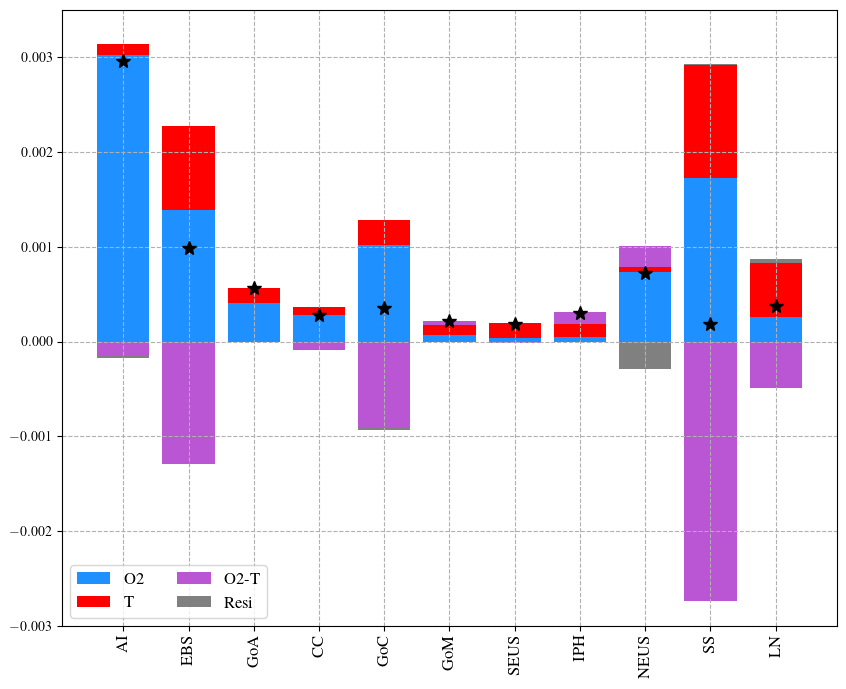

In [15]:
fig = plt.figure(figsize=[10, 8])
gs = gridspec.GridSpec(1,1)
ax = fig.add_subplot(gs[0])
jj = 0
boxnb = [65,1,2,3,4,5,6,10,7,8,9]
boxna = ['AI','EBS','GoA','CC','GoC','GoM','SEUS','IPH','NEUS','SS','LN']
#terms = ['O2','T','S','Resi','O2-T','O2-S','O2-Res.','T-S','T-Resi','S-Resi']
cols = ['dodgerblue','r','mediumorchid','gray','gold','green','sienna','darkorange','pink','olive']
for box in boxnb:
    Phi_0 = Phi_ori.sel(lme=box).values.reshape([70,12])[6:-10,:].mean(axis=1)
    Phi_1 = Phi_bar.sel(lme=box).values
    Phi_2 = Phi_O2.sel(lme=box).values.reshape([70,12])[6:-10,:].mean(axis=1)
    Phi_3 = Phi_T.sel(lme=box).values.reshape([70,12])[6:-10,:].mean(axis=1)
    Phi_4 = Phi_S.sel(lme=box).values.reshape([70,12])[6:-10,:].mean(axis=1)
    Phi_5 = Phi_AOU.sel(lme=box).values.reshape([70,12])[6:-10,:].mean(axis=1)
    Phi_6 = Phi_O2sol.sel(lme=box).values.reshape([70,12])[6:-10,:].mean(axis=1)
    Phi_7 = Phi_0-(Phi_1+Phi_2+Phi_3+Phi_4)
    #
    var_0 = 1./(len(Phi_0)-1.)*np.sum((Phi_0 - np.mean(Phi_0))**2)
    var_2 = 1./(len(Phi_0)-1.)*np.sum((Phi_2 - np.mean(Phi_2))**2)
    var_3 = 1./(len(Phi_0)-1.)*np.sum((Phi_3 - np.mean(Phi_3))**2)
    var_4 = 1./(len(Phi_0)-1.)*np.sum((Phi_4 - np.mean(Phi_4))**2)
    var_5 = 1./(len(Phi_0)-1.)*np.sum((Phi_5 - np.mean(Phi_5))**2)
    var_6 = 1./(len(Phi_0)-1.)*np.sum((Phi_6 - np.mean(Phi_6))**2)
    var_7 = 1./(len(Phi_0)-1.)*np.sum((Phi_7 - np.mean(Phi_7))**2)
    # co-variance
    var_23 = 2./(len(Phi_0)-1.)*np.sum((Phi_2 - np.mean(Phi_2))*(Phi_3 - np.mean(Phi_3)))
    var_24 = 2./(len(Phi_0)-1.)*np.sum((Phi_2 - np.mean(Phi_2))*(Phi_4 - np.mean(Phi_4)))
    var_25 = 2./(len(Phi_0)-1.)*np.sum((Phi_2 - np.mean(Phi_2))*(Phi_5 - np.mean(Phi_5)))
    var_26 = 2./(len(Phi_0)-1.)*np.sum((Phi_2 - np.mean(Phi_2))*(Phi_6 - np.mean(Phi_6)))
    var_27 = 2./(len(Phi_0)-1.)*np.sum((Phi_2 - np.mean(Phi_2))*(Phi_7 - np.mean(Phi_7)))
    #
    var_34 = 2./(len(Phi_0)-1.)*np.sum((Phi_3 - np.mean(Phi_3))*(Phi_4 - np.mean(Phi_4)))
    var_35 = 2./(len(Phi_0)-1.)*np.sum((Phi_3 - np.mean(Phi_3))*(Phi_5 - np.mean(Phi_5)))
    var_36 = 2./(len(Phi_0)-1.)*np.sum((Phi_3 - np.mean(Phi_3))*(Phi_6 - np.mean(Phi_6)))
    var_37 = 2./(len(Phi_0)-1.)*np.sum((Phi_3 - np.mean(Phi_3))*(Phi_7 - np.mean(Phi_7)))
    #
    var_45 = 2./(len(Phi_0)-1.)*np.sum((Phi_4 - np.mean(Phi_4))*(Phi_5 - np.mean(Phi_5)))
    var_46 = 2./(len(Phi_0)-1.)*np.sum((Phi_4 - np.mean(Phi_4))*(Phi_6 - np.mean(Phi_6)))
    var_47 = 2./(len(Phi_0)-1.)*np.sum((Phi_4 - np.mean(Phi_4))*(Phi_7 - np.mean(Phi_7)))
    #
    var_56 = 2./(len(Phi_0)-1.)*np.sum((Phi_5 - np.mean(Phi_5))*(Phi_6 - np.mean(Phi_6)))
    var_57 = 2./(len(Phi_0)-1.)*np.sum((Phi_5 - np.mean(Phi_5))*(Phi_7 - np.mean(Phi_7)))
    #
    var_67 = 2./(len(Phi_0)-1.)*np.sum((Phi_6 - np.mean(Phi_6))*(Phi_7 - np.mean(Phi_7)))
    #
    #data = [var_2,var_3,var_4,var_7,var_23,var_24,var_27,var_34,var_37,var_47]
    #terms = ['O2','T','S','Resi','O2-T','O2-S','O2-Res.','T-S','T-Resi','S-Resi']
    data = [var_2,var_3,var_23,var_7+var_4+var_24+var_27+var_34+var_37+var_47]
    terms = ['O2','T','O2-T','Resi']
    #,'S-O2sol','S-Resi','AOU-O2sol','AOU-Resi','O2sol-Resi']
    #ax = fig.add_subplot(gs[jj])
    pos = 0; nes = 0
    for kk in range(len(data)):
        if box == 65:
            if data[kk] >= 0:
                ax.bar(jj, data[kk], color=cols[kk], bottom=pos, label=terms[kk])
                pos = pos + data[kk]
            else:
                ax.bar(jj, data[kk], color=cols[kk], bottom=nes, label=terms[kk])
                nes = nes + data[kk]
        else:
            if data[kk] >= 0:
                ax.bar(jj, data[kk], color=cols[kk], bottom=pos)
                pos = pos + data[kk]
            else:
                ax.bar(jj, data[kk], color=cols[kk], bottom=nes)
                nes = nes + data[kk]
    #
    if jj == 10:
        ax.legend(loc=0., ncol=2, fontsize='large')
    #
    ax.plot(jj,var_0,'*',color='k',markersize=10)
    ax.set_xticks(range(11))
    ax.set_xticklabels(boxna, fontsize=12, rotation=90)
    ax.grid(linestyle='dashed')
    if layer == '0-200m':
        ax.set_ylim(-0.003,0.0035)
    else:
        ax.set_ylim(-0.009,0.011)
    #print(data)
    jj = jj + 1
output=f'/glade/scratch/{USER}/DPLE-plots'
outfile=f'{output}/LME_box01-11_FOSI_hindcast_Phi_components_variance_{layer}_1948-2017_yearly_barplot_s.png'
plt.savefig(outfile,dpi=400)
plt.show()

0.00295830558942657 0.002958305589426569
0.000985968556466333 0.0009859685564663331
0.000567059412312683 0.0005670594123126828
0.0002757915686105546 0.00027579156861055415
0.0003537928979747392 0.0003537928979747399
0.0002146256411515909 0.00021462564115159115
0.00018492984860603577 0.00018492984860603575
0.00030657474363551324 0.00030657474363551346
0.0007223784239360982 0.0007223784239360978
0.0001889485759003354 0.00018894857590033524
0.0003805397129936433 0.00038053971299364307


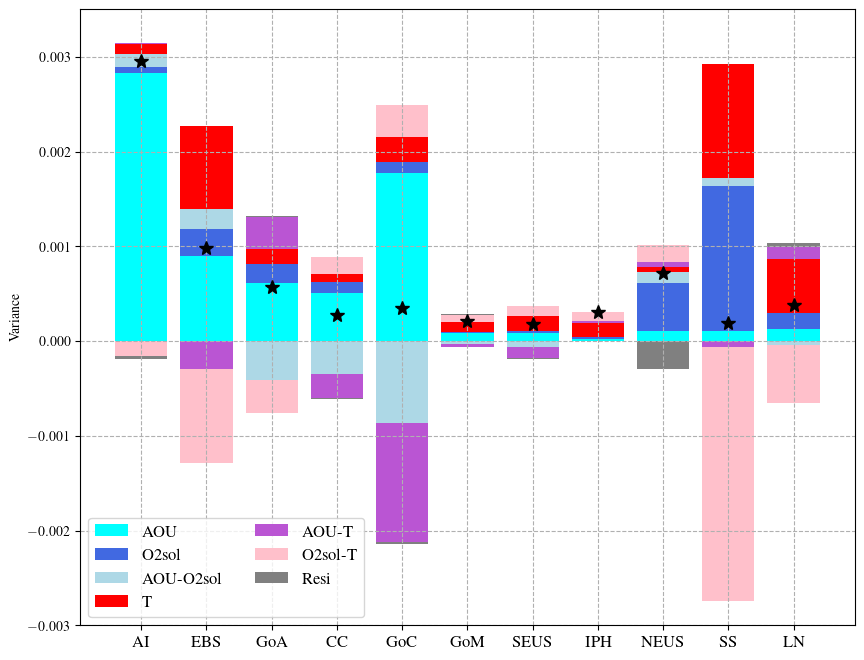

In [16]:
fig = plt.figure(figsize=[10, 8])
gs = gridspec.GridSpec(1,1)
ax = fig.add_subplot(gs[0])
jj = 0
boxnb = [65,1,2,3,4,5,6,10,7,8,9]
boxna = ['AI','EBS','GoA','CC','GoC','GoM','SEUS','IPH','NEUS','SS','LN']
#terms = ['AOU','O2sol','AOU-O2sol','T','S','Resi','AOU-T','O2sol-T','AOU-S','O2sol-S','AOU-Resi','O2sol-Resi','T-S','T-Resi','S-Resi']
cols = ['cyan','royalblue','lightblue','r','mediumorchid','pink','gray','gold','green','lime','sienna','peru','darkorange','pink','olive']
for box in boxnb:
    Phi_0 = Phi_ori.sel(lme=box).values.reshape([70,12])[6:-10,:].mean(axis=1)
    Phi_1 = Phi_bar.sel(lme=box).values
    Phi_2 = Phi_O2.sel(lme=box).values.reshape([70,12])[6:-10,:].mean(axis=1)
    Phi_3 = Phi_T.sel(lme=box).values.reshape([70,12])[6:-10,:].mean(axis=1)
    Phi_4 = Phi_S.sel(lme=box).values.reshape([70,12])[6:-10,:].mean(axis=1)
    Phi_5 = Phi_AOU.sel(lme=box).values.reshape([70,12])[6:-10,:].mean(axis=1)
    Phi_6 = Phi_O2sol.sel(lme=box).values.reshape([70,12])[6:-10,:].mean(axis=1)
    Phi_7 = Phi_0-(Phi_1+Phi_2+Phi_3+Phi_4)
    #Phi_7 = Phi_0-(Phi_1+Phi_3+Phi_4+Phi_5+Phi_6)
    #
    var_0 = 1./(len(Phi_0)-1.)*np.sum((Phi_0 - np.mean(Phi_0))**2)
    var_2 = 1./(len(Phi_0)-1.)*np.sum((Phi_2 - np.mean(Phi_2))**2)
    var_3 = 1./(len(Phi_0)-1.)*np.sum((Phi_3 - np.mean(Phi_3))**2)
    var_4 = 1./(len(Phi_0)-1.)*np.sum((Phi_4 - np.mean(Phi_4))**2)
    var_5 = 1./(len(Phi_0)-1.)*np.sum((Phi_5 - np.mean(Phi_5))**2)
    var_6 = 1./(len(Phi_0)-1.)*np.sum((Phi_6 - np.mean(Phi_6))**2)
    var_7 = 1./(len(Phi_0)-1.)*np.sum((Phi_7 - np.mean(Phi_7))**2)
    # co-variance
    var_23 = 2./(len(Phi_0)-1.)*np.sum((Phi_2 - np.mean(Phi_2))*(Phi_3 - np.mean(Phi_3)))
    var_24 = 2./(len(Phi_0)-1.)*np.sum((Phi_2 - np.mean(Phi_2))*(Phi_4 - np.mean(Phi_4)))
    var_25 = 2./(len(Phi_0)-1.)*np.sum((Phi_2 - np.mean(Phi_2))*(Phi_5 - np.mean(Phi_5)))
    var_26 = 2./(len(Phi_0)-1.)*np.sum((Phi_2 - np.mean(Phi_2))*(Phi_6 - np.mean(Phi_6)))
    var_27 = 2./(len(Phi_0)-1.)*np.sum((Phi_2 - np.mean(Phi_2))*(Phi_7 - np.mean(Phi_7)))
    #
    var_34 = 2./(len(Phi_0)-1.)*np.sum((Phi_3 - np.mean(Phi_3))*(Phi_4 - np.mean(Phi_4)))
    var_35 = 2./(len(Phi_0)-1.)*np.sum((Phi_3 - np.mean(Phi_3))*(Phi_5 - np.mean(Phi_5)))
    var_36 = 2./(len(Phi_0)-1.)*np.sum((Phi_3 - np.mean(Phi_3))*(Phi_6 - np.mean(Phi_6)))
    var_37 = 2./(len(Phi_0)-1.)*np.sum((Phi_3 - np.mean(Phi_3))*(Phi_7 - np.mean(Phi_7)))
    #
    var_45 = 2./(len(Phi_0)-1.)*np.sum((Phi_4 - np.mean(Phi_4))*(Phi_5 - np.mean(Phi_5)))
    var_46 = 2./(len(Phi_0)-1.)*np.sum((Phi_4 - np.mean(Phi_4))*(Phi_6 - np.mean(Phi_6)))
    var_47 = 2./(len(Phi_0)-1.)*np.sum((Phi_4 - np.mean(Phi_4))*(Phi_7 - np.mean(Phi_7)))
    #
    var_56 = 2./(len(Phi_0)-1.)*np.sum((Phi_5 - np.mean(Phi_5))*(Phi_6 - np.mean(Phi_6)))
    var_57 = 2./(len(Phi_0)-1.)*np.sum((Phi_5 - np.mean(Phi_5))*(Phi_7 - np.mean(Phi_7)))
    #
    var_67 = 2./(len(Phi_0)-1.)*np.sum((Phi_6 - np.mean(Phi_6))*(Phi_7 - np.mean(Phi_7)))
    #
    #data = [var_2,var_3,var_4,var_7,var_23,var_24,var_27,var_34,var_37,var_47]
    #terms = ['O2','T','S','Resi','O2-T','O2-S','O2-Res.','T-S','T-Resi','S-Resi']
    #data = [var_5,var_6,var_56,var_3,var_4,var_7,var_35,var_36,var_45,var_46,var_57,var_67,var_34,var_37,var_47]
    #terms = ['AOU','O2sol','AOU-O2sol','T','S','Resi','AOU-T','O2sol-T','AOU-S','O2sol-S','AOU-Resi','O2sol-Resi','T-S','T-Resi','S-Resi']
    data = [var_5,var_6,var_56,var_3,var_35,var_36,var_4+var_7+var_45+var_46+var_57+var_67+var_34+var_37+var_47]
    terms = ['AOU','O2sol','AOU-O2sol','T','AOU-T','O2sol-T','Resi']
    #,'S-O2sol','S-Resi','AOU-O2sol','AOU-Resi','O2sol-Resi']
    #ax = fig.add_subplot(gs[jj])
    pos = 0; nes = 0
    for kk in range(len(data)):
        if box == 65:
            if data[kk] >= 0:
                ax.bar(jj, data[kk], color=cols[kk], bottom=pos, label=terms[kk])
                pos = pos + data[kk]
            else:
                ax.bar(jj, data[kk], color=cols[kk], bottom=nes, label=terms[kk])
                nes = nes + data[kk]
        else:
            if data[kk] >= 0:
                ax.bar(jj, data[kk], color=cols[kk], bottom=pos)
                pos = pos + data[kk]
            else:
                ax.bar(jj, data[kk], color=cols[kk], bottom=nes)
                nes = nes + data[kk]
    #
    if jj == 10:
        ax.legend(loc=0, ncol=2, fontsize='large')
    ax.plot(jj,var_0,'*',color='k',markersize=10)
    ax.set_xticks(range(11))
    ax.set_xticklabels(boxna, fontsize=12, rotation=0)
    ax.grid(linestyle='dashed')
    if layer == '0-200m':
        ax.set_ylim(-0.003,0.0035)
    else:
        ax.set_ylim(-0.009,0.011)
    #print(data)
    jj = jj + 1
    print(np.sum(data),var_0)
    ax.set_ylabel('Variance')
output=f'/glade/scratch/{USER}/DPLE-plots'
outfile=f'{output}/LME_box01-11_FOSI_hindcast_Phi_components_variance_{layer}_1948-2017_yearly_barplot2_s.png'
plt.savefig(outfile,dpi=400)
plt.show()

0.0030285812667094044 0.002958305589426569
0.0013911780688962215 0.0009859685564663331
0.0004105981043662007 0.0005670594123126828
0.00028339734119668816 0.00027579156861055415
0.0010233309096490647 0.0003537928979747399
6.755790668229988e-05 0.00021462564115159115
4.047839949131884e-05 0.00018492984860603575
4.5461689225375866e-05 0.00030657474363551346
0.0007297339944662979 0.0007223784239360978
0.0017248573531975899 0.00018894857590033524
0.0002562470574613965 0.00038053971299364307


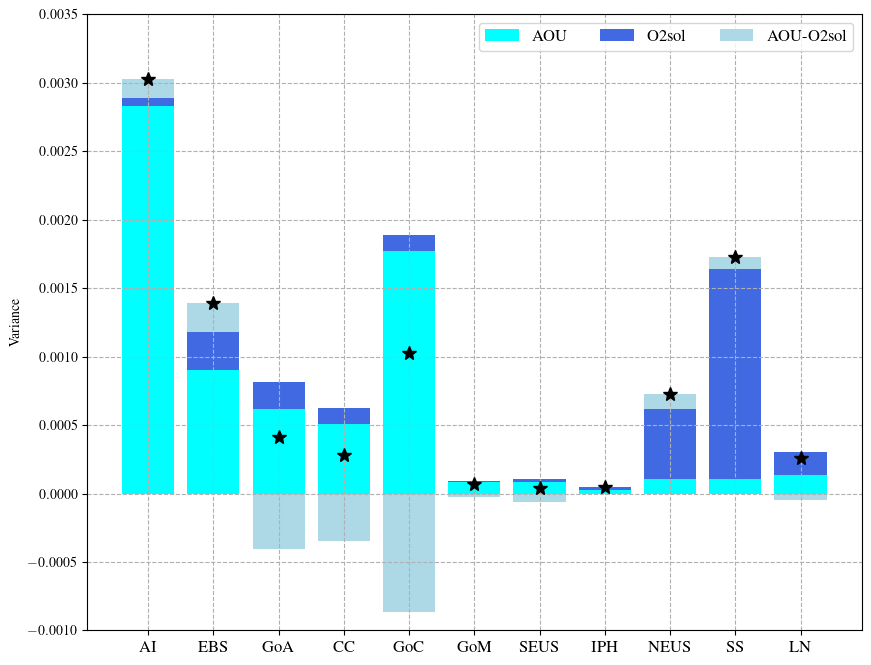

In [17]:
fig = plt.figure(figsize=[10, 8])
gs = gridspec.GridSpec(1,1)
ax = fig.add_subplot(gs[0])
jj = 0
boxnb = [65,1,2,3,4,5,6,10,7,8,9]
boxna = ['AI','EBS','GoA','CC','GoC','GoM','SEUS','IPH','NEUS','SS','LN']
terms = ['AOU','O2sol','AOU-O2sol','T','S','Resi','AOU-T','O2sol-T','AOU-S','O2sol-S','AOU-Resi','O2sol-Resi','T-S','T-Resi','S-Resi']
cols = ['cyan','royalblue','lightblue','r','gold','gray','mediumorchid','magenta','green','lime','sienna','peru','darkorange','pink','olive']
for box in boxnb:
    Phi_0 = Phi_ori.sel(lme=box).values.reshape([70,12])[6:-10,:].mean(axis=1)
    Phi_1 = Phi_bar.sel(lme=box).values
    Phi_2 = Phi_O2.sel(lme=box).values.reshape([70,12])[6:-10,:].mean(axis=1)
    Phi_3 = Phi_T.sel(lme=box).values.reshape([70,12])[6:-10,:].mean(axis=1)
    Phi_4 = Phi_S.sel(lme=box).values.reshape([70,12])[6:-10,:].mean(axis=1)
    Phi_5 = Phi_AOU.sel(lme=box).values.reshape([70,12])[6:-10,:].mean(axis=1)
    Phi_6 = Phi_O2sol.sel(lme=box).values.reshape([70,12])[6:-10,:].mean(axis=1)
    Phi_7 = Phi_0-(Phi_1+Phi_2+Phi_3+Phi_4)
    #Phi_7 = Phi_0-(Phi_1+Phi_3+Phi_4+Phi_5+Phi_6)
    #
    var_0 = 1./(len(Phi_0)-1.)*np.sum((Phi_0 - np.mean(Phi_0))**2)
    var_2 = 1./(len(Phi_0)-1.)*np.sum((Phi_2 - np.mean(Phi_2))**2)
    var_3 = 1./(len(Phi_0)-1.)*np.sum((Phi_3 - np.mean(Phi_3))**2)
    var_4 = 1./(len(Phi_0)-1.)*np.sum((Phi_4 - np.mean(Phi_4))**2)
    var_5 = 1./(len(Phi_0)-1.)*np.sum((Phi_5 - np.mean(Phi_5))**2)
    var_6 = 1./(len(Phi_0)-1.)*np.sum((Phi_6 - np.mean(Phi_6))**2)
    var_7 = 1./(len(Phi_0)-1.)*np.sum((Phi_7 - np.mean(Phi_7))**2)
    # co-variance
    var_23 = 2./(len(Phi_0)-1.)*np.sum((Phi_2 - np.mean(Phi_2))*(Phi_3 - np.mean(Phi_3)))
    var_24 = 2./(len(Phi_0)-1.)*np.sum((Phi_2 - np.mean(Phi_2))*(Phi_4 - np.mean(Phi_4)))
    var_25 = 2./(len(Phi_0)-1.)*np.sum((Phi_2 - np.mean(Phi_2))*(Phi_5 - np.mean(Phi_5)))
    var_26 = 2./(len(Phi_0)-1.)*np.sum((Phi_2 - np.mean(Phi_2))*(Phi_6 - np.mean(Phi_6)))
    var_27 = 2./(len(Phi_0)-1.)*np.sum((Phi_2 - np.mean(Phi_2))*(Phi_7 - np.mean(Phi_7)))
    #
    var_34 = 2./(len(Phi_0)-1.)*np.sum((Phi_3 - np.mean(Phi_3))*(Phi_4 - np.mean(Phi_4)))
    var_35 = 2./(len(Phi_0)-1.)*np.sum((Phi_3 - np.mean(Phi_3))*(Phi_5 - np.mean(Phi_5)))
    var_36 = 2./(len(Phi_0)-1.)*np.sum((Phi_3 - np.mean(Phi_3))*(Phi_6 - np.mean(Phi_6)))
    var_37 = 2./(len(Phi_0)-1.)*np.sum((Phi_3 - np.mean(Phi_3))*(Phi_7 - np.mean(Phi_7)))
    #
    var_45 = 2./(len(Phi_0)-1.)*np.sum((Phi_4 - np.mean(Phi_4))*(Phi_5 - np.mean(Phi_5)))
    var_46 = 2./(len(Phi_0)-1.)*np.sum((Phi_4 - np.mean(Phi_4))*(Phi_6 - np.mean(Phi_6)))
    var_47 = 2./(len(Phi_0)-1.)*np.sum((Phi_4 - np.mean(Phi_4))*(Phi_7 - np.mean(Phi_7)))
    #
    var_56 = 2./(len(Phi_0)-1.)*np.sum((Phi_5 - np.mean(Phi_5))*(Phi_6 - np.mean(Phi_6)))
    var_57 = 2./(len(Phi_0)-1.)*np.sum((Phi_5 - np.mean(Phi_5))*(Phi_7 - np.mean(Phi_7)))
    #
    var_67 = 2./(len(Phi_0)-1.)*np.sum((Phi_6 - np.mean(Phi_6))*(Phi_7 - np.mean(Phi_7)))
    #
    #data = [var_2,var_3,var_4,var_7,var_23,var_24,var_27,var_34,var_37,var_47]
    #terms = ['O2','T','S','Resi','O2-T','O2-S','O2-Res.','T-S','T-Resi','S-Resi']
    #data = [var_5,var_6,var_56,var_3,var_4,var_7,var_35,var_36,var_45,var_46,var_57,var_67,var_34,var_37,var_47]
    #terms = ['AOU','O2sol','AOU-O2sol','T','S','Resi','AOU-T','O2sol-T','AOU-S','O2sol-S','AOU-Resi','O2sol-Resi','T-S','T-Resi','S-Resi']
    #,'S-O2sol','S-Resi','AOU-O2sol','AOU-Resi','O2sol-Resi']
    data = [var_5,var_6,var_56]
    terms = ['AOU','O2sol','AOU-O2sol']
    #ax = fig.add_subplot(gs[jj])
    pos = 0; nes = 0
    for kk in range(len(data)):
        if box == 65:
            if data[kk] >= 0:
                ax.bar(jj, data[kk], color=cols[kk], bottom=pos, label=terms[kk])
                pos = pos + data[kk]
            else:
                ax.bar(jj, data[kk], color=cols[kk], bottom=nes, label=terms[kk])
                nes = nes + data[kk]
        else:
            if data[kk] >= 0:
                ax.bar(jj, data[kk], color=cols[kk], bottom=pos)
                pos = pos + data[kk]
            else:
                ax.bar(jj, data[kk], color=cols[kk], bottom=nes)
                nes = nes + data[kk]
    #
    if jj == 10:
        #ax.legend(bbox_to_anchor=(1.01,.5), ncol=3, fontsize='large')
        ax.legend(loc=0, ncol=3, fontsize='large')
    ax.plot(jj,var_2,'*',color='k',markersize=10)
    ax.set_xticks(range(11))
    ax.set_xticklabels(boxna, fontsize=12, rotation=0)
    ax.grid(linestyle='dashed')
    if layer == '0-200m':
        ax.set_ylim(-0.001,0.0035)
    else:
        ax.set_ylim(-0.001,0.007)
    #print(data)
    jj = jj + 1
    print(np.sum(data),var_0)
    ax.set_ylabel('Variance')
output=f'/glade/scratch/{USER}/DPLE-plots'
outfile=f'{output}/LME_box01-11_FOSI_hindcast_Phi_components_variance_{layer}_1948-2017_yearly_barplot3.png'
plt.savefig(outfile,dpi=400)
plt.show()